## Import Library

In [45]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data preparation

In [46]:
data = pd.read_csv(r"/Users/mac/Downloads/iris_edit - Iris.csv")

In [47]:
# data['SepalLengthCm'] = data['SepalLengthCm'].astype(int)
# data['SepalWidthCm'] = data['SepalWidthCm'].astype(int)
# data['PetalLengthCm'] = data['PetalLengthCm'].astype(int)
# data['PetalWidthCm'] = data['PetalWidthCm'].astype(int)

## EDA

In [48]:
print(data.info())
print(data.describe())
print(data.head())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.90000

#### Terdapat outlier di kolom SepalWidthCm, jadi ini harus dihilangkan menggunakan quantile

<Axes: >

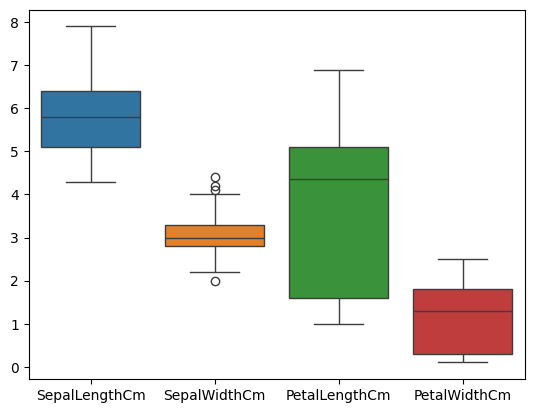

In [49]:
sns.boxplot(data)

#### Ini adalah fungsi yang digunakan untuk menghapus outlier

In [50]:
# Fungsi untuk mengganti outlier dengan mean
def impute_outliers_with_mean(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Menentukan batas bawah dan batas atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menghitung rata-rata kolom
    mean_value = data[column].mean()
    
    # Mengganti outlier dengan mean
    data[column] = data[column].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)
    
    return data

# Mengganti outlier dengan mean pada setiap kolom numerik
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data = impute_outliers_with_mean(data, column)

# Menampilkan data setelah imputasi
print(data.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


#### Outlier yang ada di kolom SepalWidthCm sudah hilang / bersih

<Axes: >

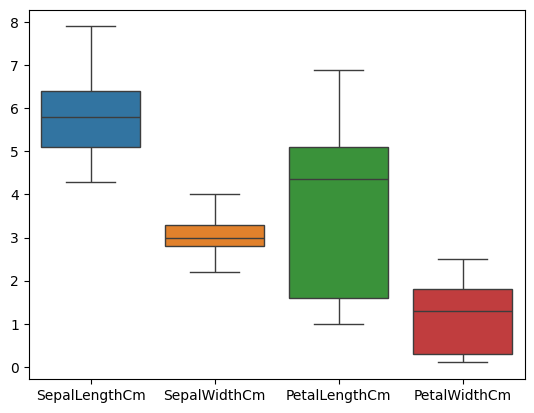

In [51]:
sns.boxplot(data)

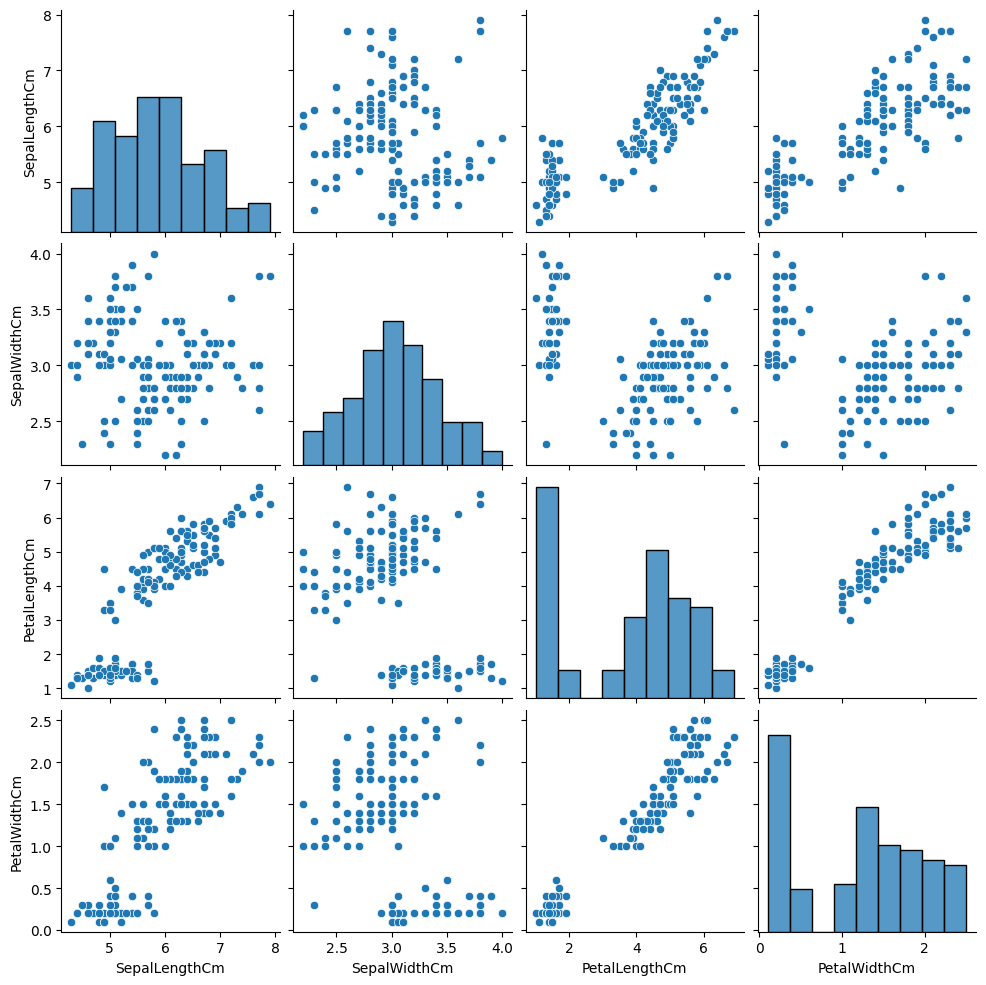

In [52]:
sns.pairplot(data)

In [53]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

## Modeling

In [ ]:
# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(\a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [ ]:
# Implementasi K-Means
def k_means(X, k, max_iter=100, tol=1e-4):
    np.random.seed(42)  # Untuk hasil yang dapat direproduksi
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]  # Inisialisasi centroid
    
    for iteration in range(max_iter):
        # Assignment: Mengelompokkan data ke centroid terdekat
        clusters = [[] for _ in range(k)]
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)
        
        # Update centroid
        new_centroids = []
        for cluster in clusters:
            if len(cluster) > 0:
                new_centroids.append(np.mean(cluster, axis=0))
            else:
                # Jika cluster kosong, pertahankan centroid lama
                new_centroids.append(centroids[len(new_centroids)])
        
        new_centroids = np.array(new_centroids)
        
        # Check konvergensi
        diff = np.sum(np.abs(new_centroids - centroids))
        if diff < tol:
            print(f"Converged at iteration {iteration+1}")
            break
        
        centroids = new_centroids
    
    return centroids, clusters

## Visualisasi

Converged at iteration 2
Converged at iteration 5
Converged at iteration 6
Converged at iteration 9


Converged at iteration 5
Converged at iteration 7
Converged at iteration 9
Converged at iteration 7
Converged at iteration 7
Converged at iteration 7


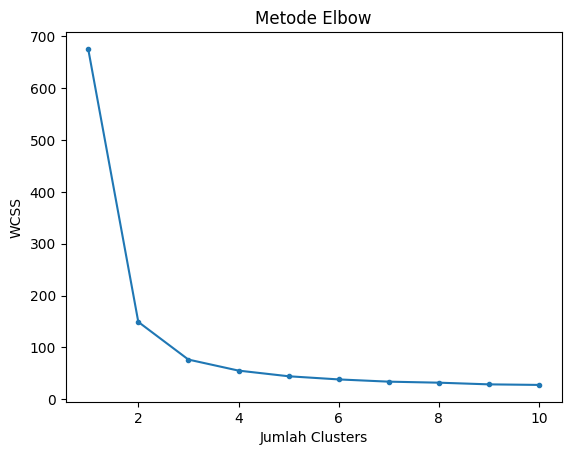

In [56]:
# Implementasi Metode Elbow dengan Penanganan Cluster Kosong
def elbow_method(X, max_clusters=10):
    wcss = []
    for k in range(1, max_clusters + 1):
        centroids, clusters = k_means(X, k)
        # Hitung Within-Cluster Sum of Squares (WCSS), hanya untuk cluster yang tidak kosong
        wcss_value = 0
        for i, cluster in enumerate(clusters):
            if len(cluster) > 0:  # Pastikan cluster tidak kosong
                wcss_value += np.sum((np.array(cluster) - centroids[i]) ** 2)
        wcss.append(wcss_value)
    return wcss

# Misalnya kita memiliki data `X` yang sudah ada (misalnya X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values)
# Menggunakan Metode Elbow untuk menentukan jumlah cluster yang optimal
wcss = elbow_method(X)
plt.plot(range(1, len(wcss) + 1), wcss, marker='.')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Clusters')
plt.ylabel('WCSS')
plt.show()

In [57]:
# Menjalankan K-Means untuk k=3
k = 3  # Jumlah cluster berdasarkan metode elbow
centroids, clusters = k_means(X, k)

# Menampilkan centroid hasil K-Means
print("Centroids:", centroids)

Converged at iteration 6
Centroids: [[5.9016129  2.7653871  4.39354839 1.43387097]
 [5.006      3.34724    1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


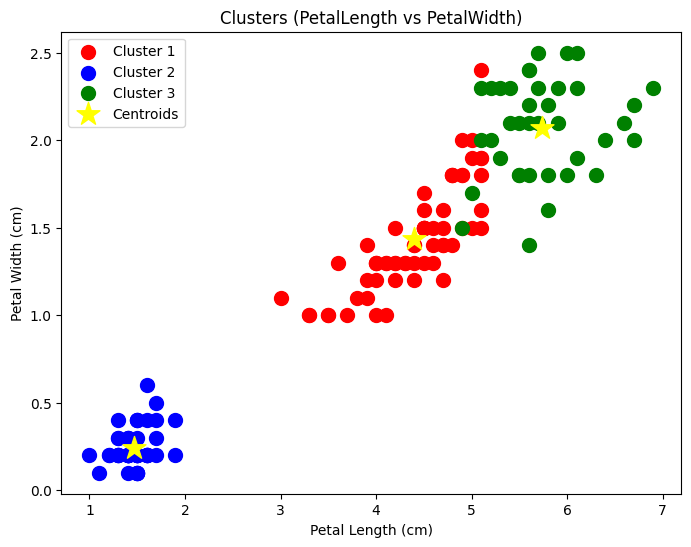

In [58]:
# Visualisasi Hasil Clustering
# Pilih 2 fitur untuk visualisasi 2D
plt.figure(figsize=(8, 6))

# Menampilkan setiap cluster dengan warna yang berbeda
colors = ['red', 'blue', 'green']  # Warna untuk setiap cluster
for cluster_idx, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 2], cluster[:, 3], s=100, c=colors[cluster_idx], label=f'Cluster {cluster_idx + 1}')

# Menampilkan centroid
plt.scatter(
    centroids[:, 2], centroids[:, 3],
    s=300, c='yellow', marker='*', label='Centroids'
)
plt.title('Clusters (PetalLength vs PetalWidth)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

## Evaluasi untuk mencari Silhouette Score dan Inertia..

In [59]:
def silhouette_score_manual(X, labels, k):
    silhouette_scores = []
    for i, point in enumerate(X):
        
        cluster_idx = labels[i]

        # Pisahkan data menjadi dalam cluster yang sama (A) dan cluster berbeda (B)
        same_cluster = X[labels == cluster_idx]
        other_clusters = [X[labels == idx] for idx in range(k) if idx != cluster_idx]

        # Hitung rata-rata jarak ke poin lain dalam cluster yang sama (A)
        if len(same_cluster) > 1:
            a = np.mean([euclidean_distance(point, other) for other in same_cluster if not np.array_equal(point, other)])
        else:
            a = 0

        # Hitung rata-rata jarak ke semua cluster lain (B)
        b = np.min([
            np.mean([euclidean_distance(point, other) for other in cluster])
            for cluster in other_clusters if len(cluster) > 0
        ])

        # Hitung Silhouette Score untuk poin ini
        silhouette = (b - a) / max(a, b) if max(a, b) > 0 else 0
        silhouette_scores.append(silhouette)
    
    # Rata-rata Silhouette Score untuk semua poin
    return np.mean(silhouette_scores)


# Buat array cluster labels untuk evaluasi
labels = np.zeros(X.shape[0], dtype=int)
for cluster_idx, cluster in enumerate(clusters):
    for point in cluster:
        idx = np.where((X == point).all(axis=1))[0][0]  # Cari indeks data asli
        labels[idx] = cluster_idx  # Tetapkan label cluster

k = 3  # Jumlah cluster yang digunakan
silhouette_avg_manual = silhouette_score_manual(X, labels, k)
print(f"Silhouette Score (manual): {silhouette_avg_manual:.4f}")

Silhouette Score (manual): 0.5193


In [60]:
# Fungsi untuk menghitung inertia
def calculate_inertia(X, centroids, clusters):
    inertia = 0
    for cluster_idx, cluster in enumerate(clusters):
        if len(cluster) > 0:
            cluster = np.array(cluster)
            # Hitung WCSS untuk setiap cluster
            inertia += np.sum((cluster - centroids[cluster_idx]) ** 2)
    return inertia

# Hitung inertia dari hasil clustering
inertia = calculate_inertia(X, centroids, clusters)
print(f"Inertia: {inertia:.4f}")

Inertia: 76.5624
